In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np



In [28]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [30]:
datos = pd.DataFrame({
    'habitaciones': [2, 3, 4, 5, 3, 4, 2, 3, 5, 4],
    'tamaño_m2': [50, 75, 100, 120, 80, 95, 60, 78, 130, 110],
    'antigüedad_años': [10, 15, 20, 25, 18, 12, 8, 17, 30, 22],
    'distancia_al_centro_km': [5, 7, 10, 12, 6, 8, 4, 9, 15, 11],
    'precio': [150, 200, 250, 300, 220, 230, 160, 210, 310, 280]
})

In [31]:
datos

,habitaciones,tamaño_m2,antigüedad_años,distancia_al_centro_km,precio
0,2,50,10,5,150
1,3,75,15,7,200
2,4,100,20,10,250
3,5,120,25,12,300
4,3,80,18,6,220
5,4,95,12,8,230
6,2,60,8,4,160
7,3,78,17,9,210
8,5,130,30,15,310
9,4,110,22,11,280


### Variable dependiente



In [32]:
vDep = datos['precio']

### Variables independientes

In [33]:

vInd = datos[['habitaciones', 'tamaño_m2', 'antigüedad_años', 'distancia_al_centro_km']]  # Variables independientes


In [34]:
vConstante = add_constant(vInd)
vif_datos = pd.DataFrame()


vif_datos['Nombre variables'] = vConstante.columns

vif_datos['VIF'] = [variance_inflation_factor(vConstante.values, i) for i in range(vConstante.shape[1])]

print(vif_datos)

         Nombre variables        VIF
0                   const  20.709748
1            habitaciones  28.696359
2               tamaño_m2  39.505117
3         antigüedad_años   9.123118
4  distancia_al_centro_km  14.035596


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
vIndE, vIndP, vDepE, vDepP = train_test_split(vInd, vDep, test_size= 0.2, random_state= 42) 

## Datos de entrenamiento vs Prueba

In [37]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(vIndE)
x_test_scaled = scaler.transform(vIndP)

In [38]:
# Aplicacion de modelo de regresion lineal

modelo = LinearRegression()
modelo.fit(x_train_scaled, vDepE)



LinearRegression()

In [39]:
predicciones_rlm_entramiento = modelo.predict(x_train_scaled )
predicciones_rlm_prueba = modelo.predict(x_test_scaled)

## Datos de entrenamiento

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


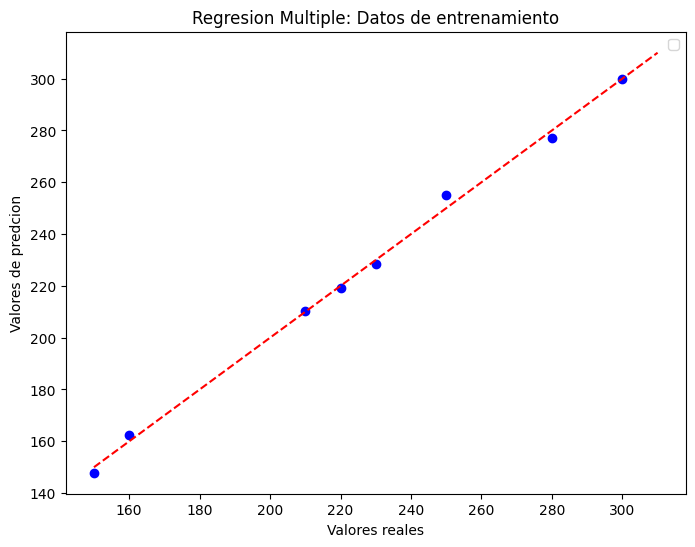

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(vDepE, predicciones_rlm_entramiento, color='blue')
# LINEA DE IDENTIDAD
plt.plot(
    [vDep.min(), vDep.max()],
    [vDep.min(), vDep.max()], 'r--'
    
)

plt.xlabel('Valores reales')
plt.ylabel('Valores de predcion')
plt.title('Regresion Multiple: Datos de entrenamiento')
plt.legend()
plt.show()

In [41]:
# EVALUAR R2
r2_rlm = r2_score(vDepP, modelo.predict(x_test_scaled))
print(f"R2 en datos de pruebas: {r2_rlm}")


R2 en datos de pruebas: 0.9493863896779242


In [42]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

0.9554779596692216


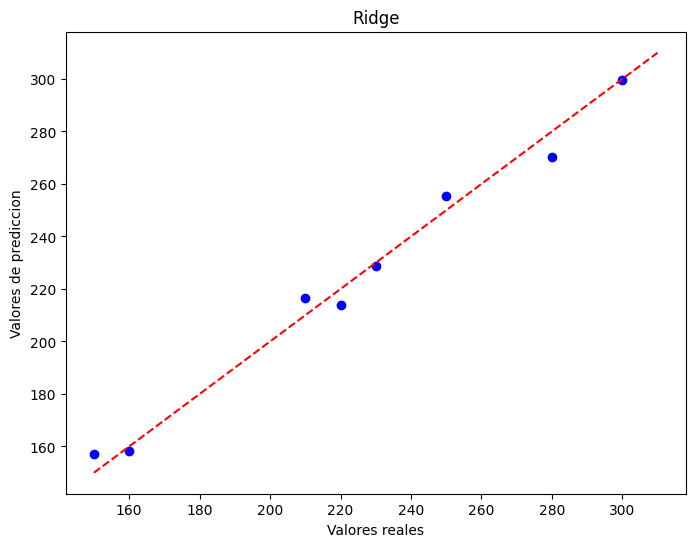

In [43]:
ridge_model.fit(x_train_scaled, vDepE)

predicciones_rm_train = ridge_model.predict(x_train_scaled)
predicciones_rm_test = ridge_model.predict(x_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(vDepE, predicciones_rm_train, color='blue')

#LINEA DE IDENTIDAD
plt.plot(
    [vDep.min(), vDep.max()],
    [vDep.min(), vDep.max()], 'r--'
)

plt.xlabel('Valores reales')
plt.ylabel('Valores de prediccion')
plt.title('Ridge')

r2_rlm = r2_score(vDepP, ridge_model.predict(x_test_scaled))
print(r2_rlm)

0.94866679048774


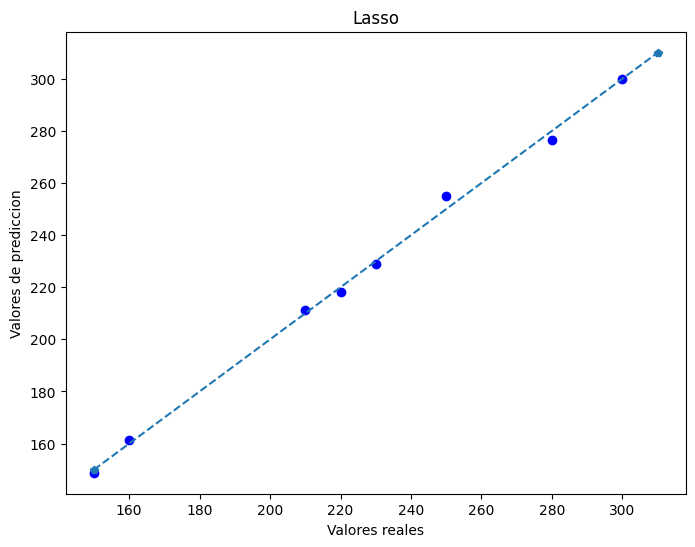

In [53]:
lasso_model.fit(x_train_scaled, vDepE)

predicciones_lm_train = lasso_model.predict(x_train_scaled)
predicciones_lm_test = lasso_model.predict(x_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(vDepE, predicciones_lm_train, color='blue')

#LINEA DE IDENTIDAD
plt.plot(
    [vDep.min(), vDep.max()],
    [vDep.min(), vDep.max()], 'p--'
)

plt.xlabel('Valores reales')
plt.ylabel('Valores de prediccion')
plt.title('Lasso')

r2_rlm = r2_score(vDepP, lasso_model.predict(x_test_scaled))
print(r2_rlm)

0.9822065418257412


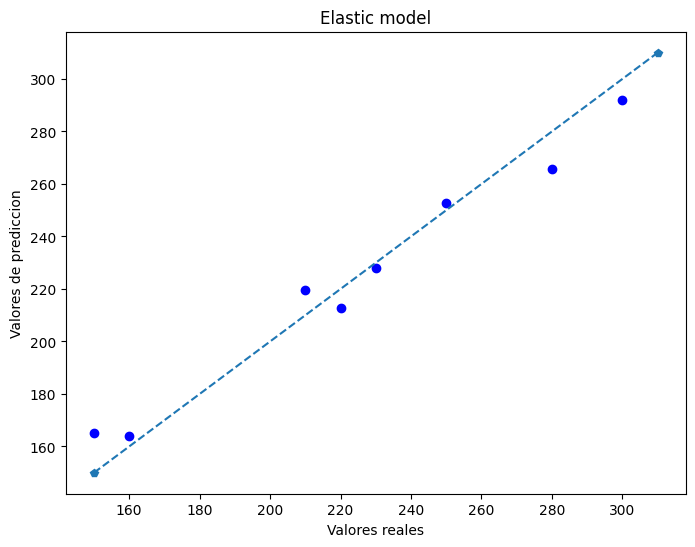

In [45]:
elastic_model.fit(x_train_scaled, vDepE)

predicciones_em_train = elastic_model.predict(x_train_scaled)
predicciones_em_test = elastic_model.predict(x_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(vDepE, predicciones_em_train, color='blue')

#LINEA DE IDENTIDAD
plt.plot(
    [vDep.min(), vDep.max()],
    [vDep.min(), vDep.max()], 'p--'
)

plt.xlabel('Valores reales')
plt.ylabel('Valores de prediccion')
plt.title('Elastic model')

r2_rlm = r2_score(vDepP, elastic_model.predict(x_test_scaled))
print(r2_rlm)

### Revision de los coeficientes

In [46]:
pendienteR = ridge_model.coef_
interseccionR = ridge_model.intercept_

print('Ridge')
print(f'Pendiente (m): {pendienteR}')
print(f'Interseccion (b): {interseccionR}')

Ridge
Pendiente (m): [11.98558559 18.28053339 12.76471684  5.96694254]
Interseccion (b): 225.0


In [47]:
pendienteL = lasso_model.coef_
interseccionL = lasso_model.intercept_

print('Lasso')
print(f'Pendiente (m): {pendienteL}')
print(f'Interseccion (b): {interseccionL}')

Lasso
Pendiente (m): [-0.         38.40124711 12.98934858 -0.99862329]
Interseccion (b): 225.0


In [48]:
pendienteE = elastic_model.coef_
interseccionE = elastic_model.intercept_

print('Elastic')
print(f'Pendiente (m): {pendienteE}')
print(f'Interseccion (b): {interseccionE}')

Elastic
Pendiente (m): [11.28885519 13.16317267 10.84223004  8.84962503]
Interseccion (b): 225.0


## Evaluar metricas de rendimiento

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_rlm = mean_squared_error (vDepP, predicciones_rlm_prueba)
rmse_rlm = np.sqrt(mse_rlm)
mae_rlm = mean_absolute_error(vDepP, predicciones_rlm_prueba)
print('Error raiz de cuadratico medio:', rmse_rlm)
print('Error absoluto:', mae_rlm)

Error raiz de cuadratico medio: 12.373607849947375
Error absoluto: 9.629828934699702


In [50]:
mse_rm = mean_squared_error(vDepP, predicciones_rm_test)
rmse_rm = np.sqrt(mse_rlm)
mae_rm = mean_absolute_error(vDepP, predicciones_rm_test)
print('Error raiz de cuadratico medio:', rmse_rm)
print('Error absoluto:', mae_rm)

Error raiz de cuadratico medio: 12.373607849947375
Error absoluto: 10.373709431257936


In [51]:
mse_lm = mean_squared_error(vDepP, predicciones_lm_test)
rmse_lm = np.sqrt(mse_rlm)
mae_lm = mean_absolute_error(vDepP, predicciones_lm_test)
print('Error raiz de cuadratico medio:', rmse_lm)
print('Error absoluto:', mae_lm)

Error raiz de cuadratico medio: 12.373607849947375
Error absoluto: 9.829323606183308


In [54]:
mse_em = mean_squared_error(vDepP, predicciones_em_test)
rmse_em = np.sqrt(mse_em)
mae_em = mean_absolute_error(vDepP, predicciones_em_test)
print('Error raiz de cuadratico medio:', rmse_em)
print('Error absoluto:', mae_em)

Error raiz de cuadratico medio: 7.336566702288821
Error absoluto: 7.336385880020487
